<a href="https://colab.research.google.com/github/hflautert/AnomalyDetection/blob/main/AnomaliaTCPSYN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experimento de reconhecimento de anomalias em ataque DoS do tipo TCPSYN.

Fonte de dados:

Rede normal:
https://iotanalytics.unsw.edu.au/anomaly-data/pcap/benign/18-05-31.pcap

Rede com ataques:
https://iotanalytics.unsw.edu.au/anomaly-data/pcap/AttackAndBenign/18-06-01.pcap

Descrição dos ataques:
https://iotanalytics.unsw.edu.au/anomaly-data/attackinfo.xlsx

Para gerar as estatísticas, os arquivos foram abertos com WireShark, aplicado filtro `tcp.flags.syn == 1 and tcp.flags.ack == 0`. Posteriormente gerado dados no menu Statistics, I/O Graph, salvo como csv, nos intervalos de 1 minuto, 10 segundos, e 1 segundo.

Ataques TCPSYN contabilizados com WireShark = [30](https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Prints/WS_TCPSYN.PNG).

In [47]:
# Importando bibliotecas
# Manipulação de matrizes e operações matemáticas de alto nível
import numpy as np
# Geração de gráficos
import matplotlib.pyplot as plt
# Funcoes media movel
import httpimport
url = "https://gist.githubusercontent.com/hflautert/5bf858b4dc005877dcd340e67d9c4e85/raw/583b3967b639335ddd701dd73a9f97477dc38eec"
with httpimport.remote_repo(url):
  import funcoesmm as fmm

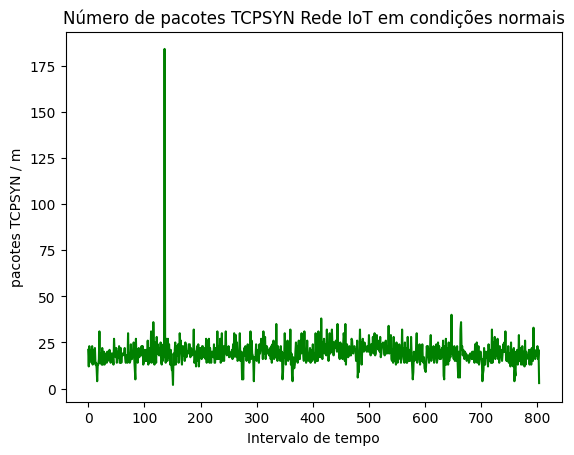

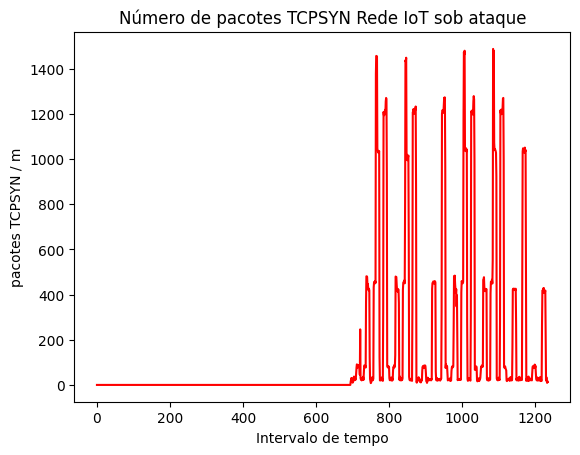

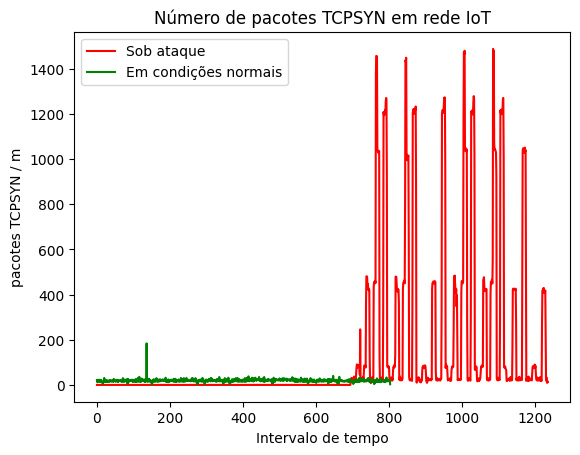

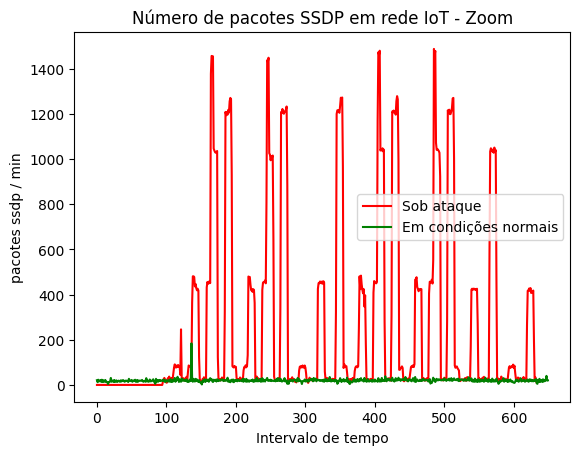

In [50]:
# Carregando dados

dados_normal_1m = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_tcpsyn_1m.csv")
dados_normal_10s = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_tcpsyn_10s.csv")
dados_normal_1s = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_tcpsyn_1s.csv")

dados_ataque_1m = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-06-01_tcpsyn_1m.csv")
dados_ataque_10s = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-06-01_tcpsyn_10s.csv")
dados_ataque_1s = fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-06-01_tcpsyn_1s.csv")

tipo_dos_pacotes='TCPSYN'

fmm.visualiza(dados_normal_1m,'m','g','Rede IoT em condições normais',tipo_dos_pacotes)
fmm.visualiza(dados_ataque_1m,'m','r','Rede IoT sob ataque',tipo_dos_pacotes)
fmm.visualizamix(dados_ataque_1m,'r',dados_normal_1m,'g','m',tipo_dos_pacotes)

# Vizualização otimizada com zoom na janela de ataque de 1, 10 e 100 pcts/s
v_dados_normal_1m = dados_normal_1m[:650]
v_dados_ataque_1m = dados_ataque_1m[600:]

# Unindo linhas
plt.plot(v_dados_ataque_1m, color = 'r', label = "Sob ataque")
plt.plot(v_dados_normal_1m, color = 'g', label = "Em condições normais")
plt.title('Número de pacotes SSDP em rede IoT - Zoom')
plt.xlabel('Intervalo de tempo')
plt.ylabel('pacotes ssdp / min')
plt.legend()
plt.show()

Total de ataques identificados: 21


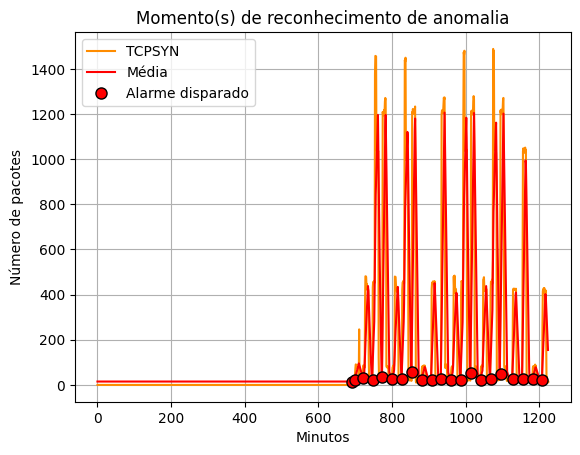

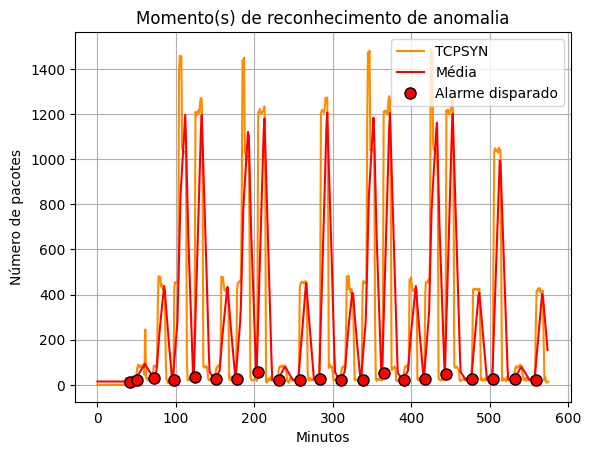

Falsos positivos: 0


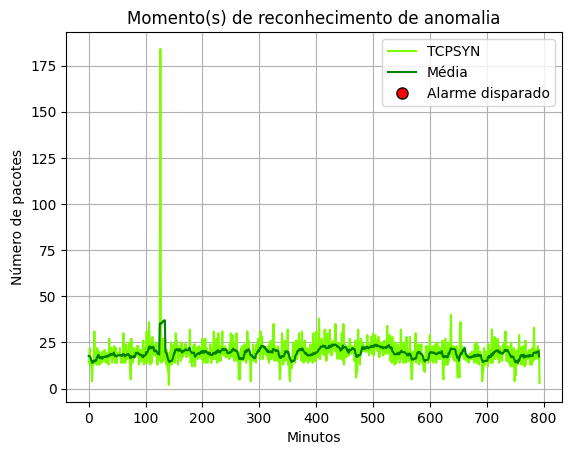

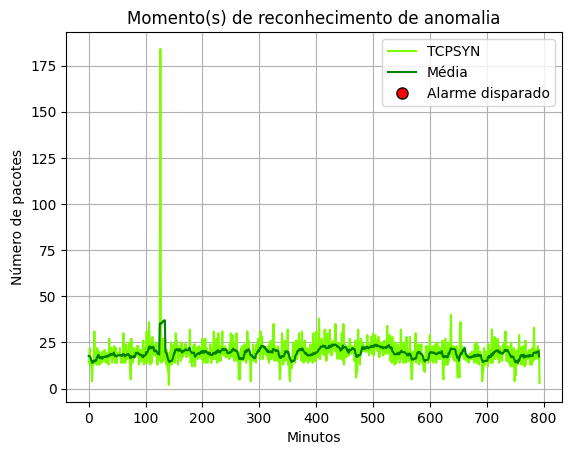

In [51]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_1m
dados_ataque=dados_ataque_1m
unidade_de_tempo='Minutos'
delta=1.10
intervalo=10
taxa_minima=15

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)
# Recorte para aproximacao
dados_ataque=dados_ataque[650:]
ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)
# Recorte para aproximacao
dados_normal=dados_normal[:]
ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 30


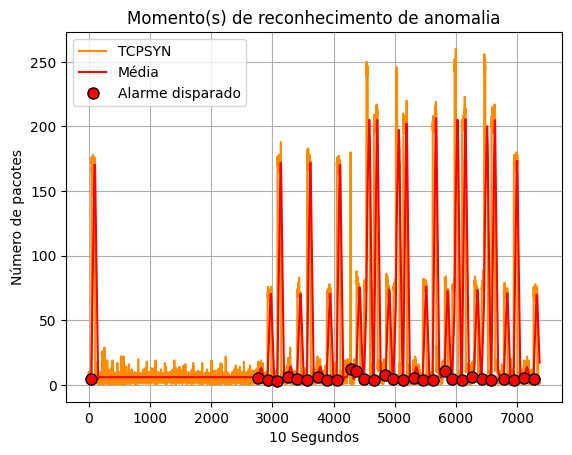

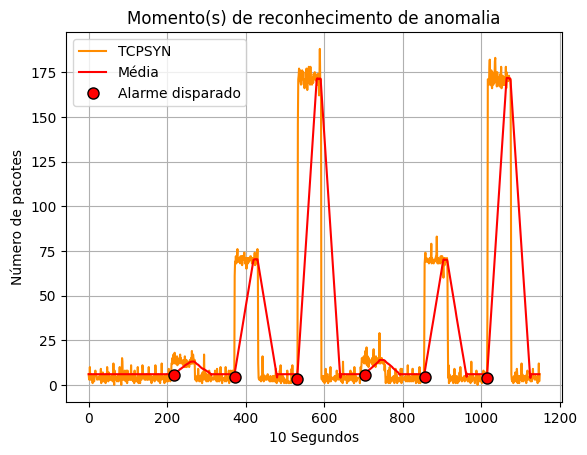

Falsos positivos: 0


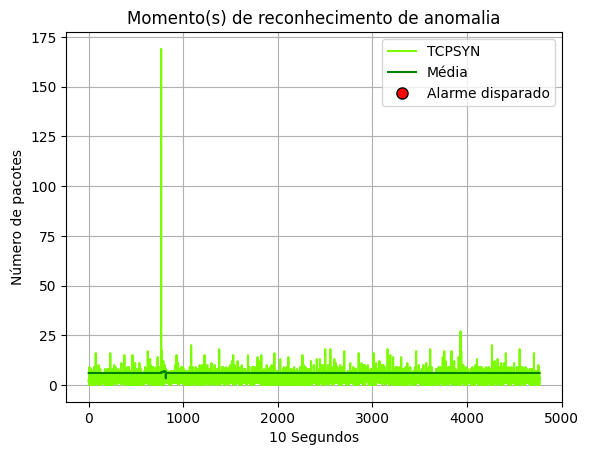

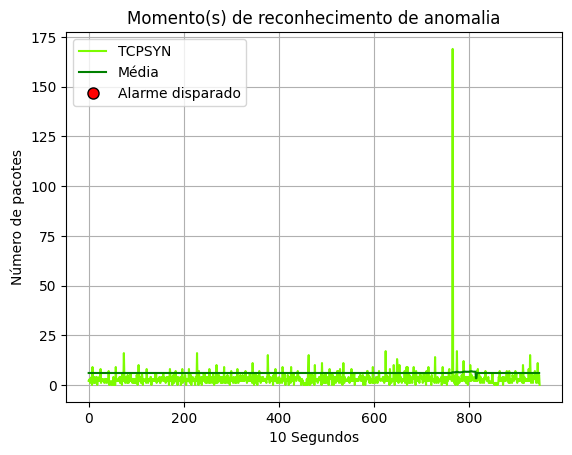

In [78]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_10s
dados_ataque=dados_ataque_10s
unidade_de_tempo='10 Segundos'
delta=1.035
intervalo=50
taxa_minima=6

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)
# Recorte para aproximacao
dados_ataque=dados_ataque[2550:3750]
ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)
# Recorte para aproximacao
dados_normal=dados_normal[:1000]
ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 26


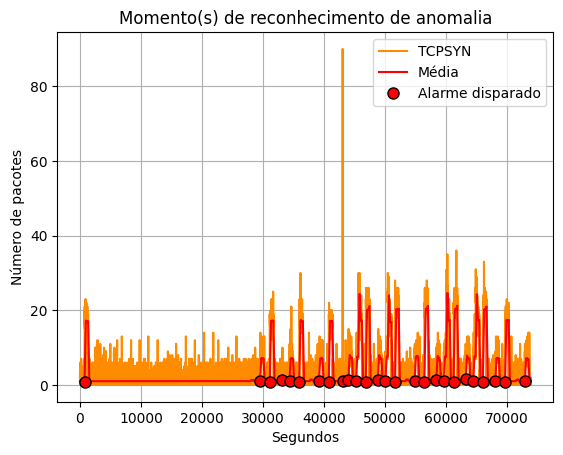

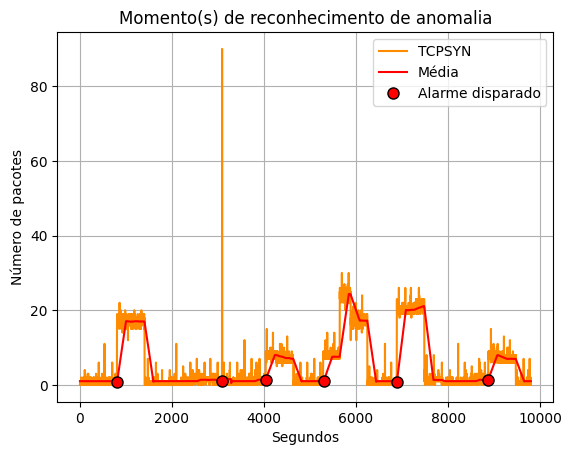

Falsos positivos: 0


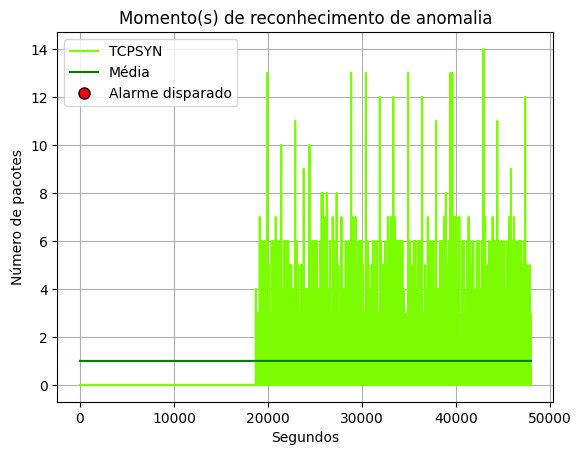

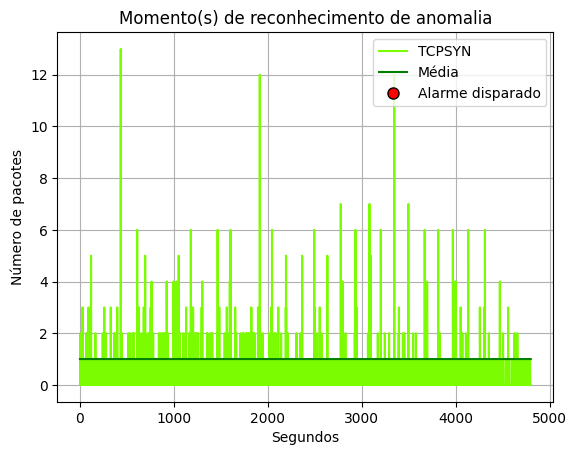

In [140]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_1s
dados_ataque=dados_ataque_1s
unidade_de_tempo='Segundos'
delta=1.015
intervalo=200
taxa_minima=1

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)
# Recorte para aproximacao
dados_ataque=dados_ataque[40000:50000]
ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)
# Recorte para aproximacao
dados_normal=dados_normal[30000:35000]
ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

In [ ]:
# Carregando dados completos 1s

pkts_TCPSYN = dados_ataque_1s
pkts_TCPSYN_n = dados_normal_1s

# Variaveis do modelo
# Crescimento no nº de pacotes
delta_v=1.01
# Tamanho da janela histórica para media movel
hist_mm=180
# Taxa mínima para considerar tcpsyn
min_tcp_syn=2

v = np.lib.stride_tricks.sliding_window_view(pkts_TCPSYN,hist_mm)
vn = np.lib.stride_tricks.sliding_window_view(pkts_TCPSYN_n,hist_mm)

cont_ataque = 0
cont_f_ataque = 0
sob_ataque = 0

for i in range(len(v)):
  if i<2: #sem base para comparacao
    #print ("menor q 2")
    pass
  else:
    #print("---")
    #print("antepenultima",v[i-2].mean())
    antpen_media=v[i-2].mean()
    #print("penultima",v[i-1].mean())
    pen_media=v[i-1].mean()
    #print("media atual",v[i].mean())
    media_atual=v[i].mean()
    if (antpen_media<min_tcp_syn) and (pen_media<min_tcp_syn) and (media_atual<min_tcp_syn):
      pass # taxa mínima
    else:
      if (media_atual>pen_media*delta_v) and (pen_media>antpen_media*delta_v) and sob_ataque == 0:
        #print ("Crescimento de x% nas ultimas 3 medicoes")
        cont_ataque += 1
        sob_ataque = 1
        #print("i:",i)
        #print (antpen_media,pen_media,media_atual)
      if (antpen_media>pen_media) and (pen_media>media_atual):
        #print ("Media em queda, desarma sob ataque")
        sob_ataque = 0

print ("Total de ataques identificados:",cont_ataque)
# crescimento de x% nos erros das ultimas 3 medias
# sob-ataque: ignora novos crescimentos - mesmo ataque
# desarma sob-ataque com queda nas ultimas 3 medias.

sob_ataque = 0

for i in range(len(vn)):
  if i<2: #sem base para comparacao
    pass
  else:
    antpen_media=vn[i-2].mean()
    pen_media=vn[i-1].mean()
    media_atual=vn[i].mean()
    if (antpen_media<min_tcp_syn) and (pen_media<min_tcp_syn) and (media_atual<min_tcp_syn):
      pass # taxa mínima
    else:
      if (media_atual>pen_media*delta_v) and (pen_media>antpen_media*delta_v) and sob_ataque == 0:
       cont_f_ataque += 1
       sob_ataque = 1
       #print (antpen_media,pen_media,media_atual)
      if (antpen_media>pen_media) and (pen_media>media_atual):
        sob_ataque = 0

print ("Falsos positivos:",cont_f_ataque)

Total de ataques identificados: 29
Falsos positivos: 0
